True Labels: [[0.03833025]
 [0.46064568]
 [0.0724666 ]
 [0.67326635]
 [0.48112747]]
Lower Bounds: [0. 0. 0. 0. 0.]
Upper Bounds: [0.74761    0.6871376  0.70941293 0.85546684 0.67112976]
Plot saved to quantileTestPlot.png


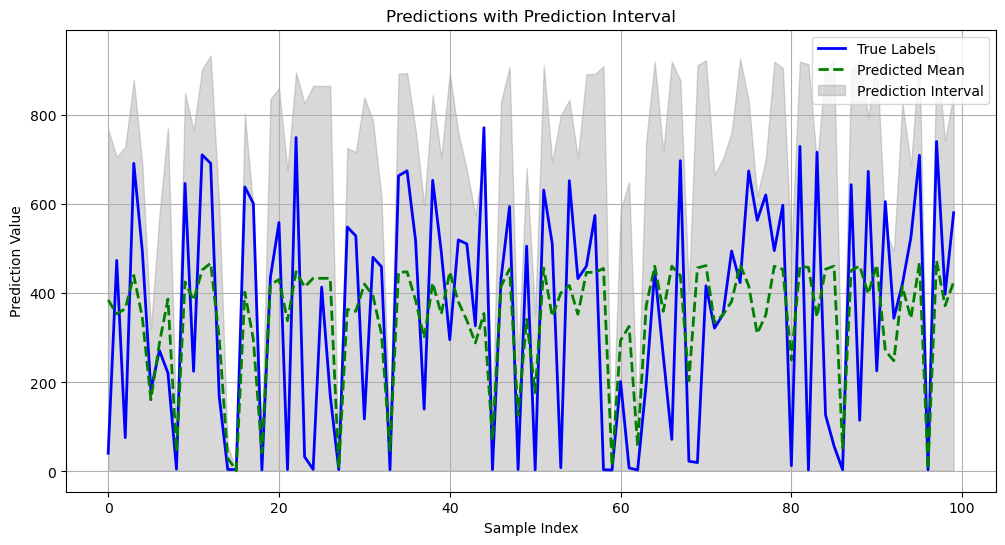

In [1]:
import pandas as pd
import numpy as np 

import torch

from dataset import WebcamDataset
from model import CNN_LSTM
from quantile_regression import QuantileRegressionModel
from trainer import Trainer
from torch.utils.data import DataLoader
from plotting import plot_predictions_vs_ground_truth
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
BATCH_SIZE = 32

# Data loading

In [4]:
train_dataset = WebcamDataset(images_path="data/X_BC_train.npy", ghi_values_path="data/labels_train.npy", subset=64)
val_dataset = WebcamDataset(images_path="data/X_BC_val.npy", ghi_values_path="data/labels_val.npy",subset=64)
test_dataset = WebcamDataset(images_path="data/X_BC_test.npy", ghi_values_path="data/labels_test.npy",subset=64)

In [5]:
train_dataset.__len__()

64

# Data visualization

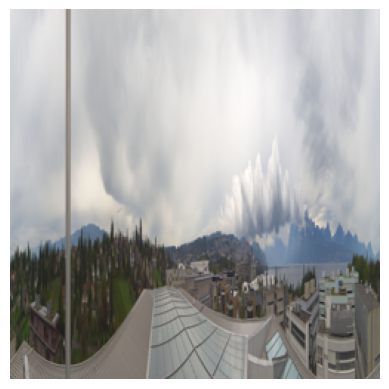

In [6]:
# Get the first image without applying normalization
first_image = train_dataset.images[0]  # Access the raw image before normalization

first_image = first_image.astype(np.uint8)  # Convert to uint8 for display

# Display the image
plt.imshow(first_image)
plt.axis('off')
plt.show()


# Model creation

In [7]:
# Initialize CNN-LSTM model and quantile wrapper
base_model = CNN_LSTM()
quantile_model = QuantileRegressionModel(base_model)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
quantile_model = quantile_model.to(device)


In [9]:

# Set training parameters
gpu_id = 0 if torch.cuda.is_available() else "cpu"
batch_size = 32
learning_rate = 1e-3
epochs = 10
working_dir = "./output"

trainer = Trainer(
    model=quantile_model,
    train_dataset=train_dataset,
    val_dataset=val_dataset,
    test_dataset=test_dataset,
    gpu_id=gpu_id,
    batch_size=batch_size,
    learning_rate=learning_rate,
    epochs=epochs,
    working_dir=working_dir,
)
# Start training
trainer.train()

/home/david/Anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


No model path provided, starting training from scratch.
[GPUcpu] Epoch 0 | Batchsize: 32 | Steps: 2
Epoch 0/10, Train Loss: 106.3312, Processed Train Batches: 2, Skipped Train Batches: 0, Train Time: 4.60s
Epoch 0/10, Validation Loss: 512.5246, Processed Validation Batches: 2, Skipped Validation Batches: 0, Eval Time: 1.73s
[GPUcpu] Epoch 1 | Batchsize: 32 | Steps: 2
Epoch 1/10, Train Loss: 106.3225, Processed Train Batches: 2, Skipped Train Batches: 0, Train Time: 4.49s
Epoch 1/10, Validation Loss: 512.5136, Processed Validation Batches: 2, Skipped Validation Batches: 0, Eval Time: 1.77s
[GPUcpu] Epoch 2 | Batchsize: 32 | Steps: 2
Epoch 2/10, Train Loss: 106.3103, Processed Train Batches: 2, Skipped Train Batches: 0, Train Time: 4.28s
Epoch 2/10, Validation Loss: 512.4972, Processed Validation Batches: 2, Skipped Validation Batches: 0, Eval Time: 1.75s
[GPUcpu] Epoch 3 | Batchsize: 32 | Steps: 2
Epoch 3/10, Train Loss: 106.2928, Processed Train Batches: 2, Skipped Train Batches: 0, Tr

In [ ]:
trainer.evaluate()


In [ ]:
plot_predictions_vs_ground_truth(model, trainer.val_loader, device)
